# ONS

## HHMDSSH

In [12]:
import csv

# Load the dataset
file_path = "C:/Users/yalam/OneDrive/Desktop/IRIS.csv"  # Update with your correct file path
data = []

with open(file_path, 'r') as file:
    reader = csv.reader(file)
    header = next(reader)  # Read the column names
    for row in reader:
        data.append([float(x) if i < 4 else x for i, x in enumerate(row)])  # Convert numbers to float

# Extract features and labels
X = [row[:4] for row in data]  # Features: Sepal & Petal measurements
y = [row[4] for row in data]   # Target: Species

print(f"Loaded {len(X)} samples with {len(X[0])} features each.")
print(f"Unique species: {set(y)}")


Loaded 150 samples with 4 features each.
Unique species: {'Iris-versicolor', 'Iris-virginica', 'Iris-setosa'}


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split data into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 1.00
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [10]:
# Basic Statistics Calculation
feature_names = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']

for i, feature in enumerate(feature_names):
    values = [row[i] for row in X]
    print(f"{feature}: Min={min(values)}, Max={max(values)}, Avg={sum(values)/len(values):.2f}")

# Count unique species
unique_species = set(y)
print(f"\nUnique Species: {unique_species}")


Sepal Length: Min=4.3, Max=7.9, Avg=5.84
Sepal Width: Min=2.0, Max=4.4, Avg=3.05
Petal Length: Min=1.0, Max=6.9, Avg=3.76
Petal Width: Min=0.1, Max=2.5, Avg=1.20

Unique Species: {'Iris-versicolor', 'Iris-virginica', 'Iris-setosa'}


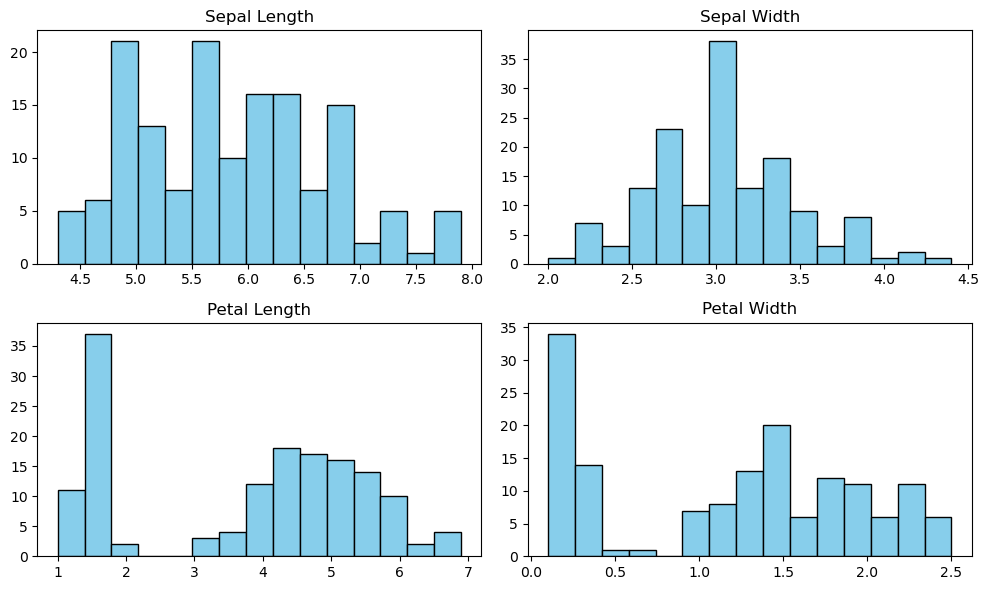

In [16]:
import matplotlib.pyplot as plt

# Feature names
feature_names = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']

# Create histograms
plt.figure(figsize=(10, 6))
for i, feature in enumerate(feature_names):
    plt.subplot(2, 2, i + 1)
    plt.hist([row[i] for row in X], bins=15, color='skyblue', edgecolor='black')
    plt.title(feature)
plt.tight_layout()
plt.savefig("feature_distributions.png")  # Save the figure
plt.show()
